In [ ]:
!pip install netCDF4
!pip install basemap
!pip install xarray
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 63.5 MB/s eta 0:00:00


# EX 1:

In [ ]:
#----#----#----#----#----#----#
# EX1: PUT YOUR CODE HERE
#----#----#----#----#----#----#
from numpy import *
from netCDF4 import *

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import BoundaryNorm
import numpy as np
from netCDF4 import Dataset

nc_path = 'drive/MyDrive/Data Visualization/sst.nc'
nc_file = Dataset(nc_path, 'r')

for name in nc_file.variables.keys():
    if (name not in nc_file.dimensions.keys()):
        data = nc_file.variables[name]
        print(name, '\t',data.units, '\t\t',data.shape, '\t',data.dtype, '\t',data.dimensions)


# Retrieve time, lat, lon variables
time = nc_file.variables['time'][:]
lat = nc_file.variables['lat'][:]
lon = nc_file.variables['lon'][:]
sst = nc_file.variables['sst'][0, :, :]  # Selecting the first time step


# Print the variables to see their content
print("Time:", time)
print("Latitude:", lat)
print("Longitude:", lon)

sst 	 degC 		 (504, 72, 144) 	 float32 	 ('time', 'lat', 'lon')
Time: [66352. 66382. 66413. 66443. 66474. 66505. 66533. 66564. 66594. 66625.
 66655. 66686. 66717. 66747. 66778. 66808. 66839. 66870. 66898. 66929.
 66959. 66990. 67020. 67051. 67082. 67112. 67143. 67173. 67204. 67235.
 67264. 67295. 67325. 67356. 67386. 67417. 67448. 67478. 67509. 67539.
 67570. 67601. 67629. 67660. 67690. 67721. 67751. 67782. 67813. 67843.
 67874. 67904. 67935. 67966. 67994. 68025. 68055. 68086. 68116. 68147.
 68178. 68208. 68239. 68269. 68300. 68331. 68359. 68390. 68420. 68451.
 68481. 68512. 68543. 68573. 68604. 68634. 68665. 68696. 68725. 68756.
 68786. 68817. 68847. 68878. 68909. 68939. 68970. 69000. 69031. 69062.
 69090. 69121. 69151. 69182. 69212. 69243. 69274. 69304. 69335. 69365.
 69396. 69427. 69455. 69486. 69516. 69547. 69577. 69608. 69639. 69669.
 69700. 69730. 69761. 69792. 69820. 69851. 69881. 69912. 69942. 69973.
 70004. 70034. 70065. 70095. 70126. 70157. 70186. 70217. 70247. 70278.
 70308.

In [ ]:
import xarray as xr
import numpy as np


# Open the NetCDF file containing SST data using xarray
nc_path = 'drive/MyDrive/Data Visualization/sst.nc'
ds = xr.open_dataset(nc_path)


# Retrieve the latitude, longitude, and SST variables
lat = ds['lat']
lon = ds['lon']
sst = ds['sst']  # shape: (time, lat, lon)

# Define the Niño 3.4 region boundaries in degrees East (0-360)
lat_min = -5.0  # 5S
lat_max = 5.0   # 5N
lon_min = 360 - 170.0  # 170W
lon_max = 360 - 120.0  # 120W

def get_area_mean(sst, lat, lon, lat_min, lat_max, lon_min, lon_max):
    """Calculate the mean SST in the specified region."""
    # Select the region
    region_sst = sst.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))
    # Calculate the mean SST in the region, averaged over lat and lon
    return region_sst.mean(dim=['lat', 'lon'])

def get_nino34_index(sst, lat, lon):
    """Calculate the Niño 3.4 index from SST data."""
    return get_area_mean(sst, lat, lon, lat_min, lat_max, lon_min, lon_max)

# Calculate the climatological mean for the first 30 years (360 months)
climatological_mean = sst[:360, :, :].mean(dim='time')

# Calculate anomalies by subtracting the climatological mean
sst_anomalies = sst - climatological_mean

# Calculate the Niño 3.4 index (area-averaged SST anomaly over the Niño 3.4 region)
nino3_4_index = get_nino34_index(sst_anomalies, lat, lon)

# Print the Niño 3.4 index for each month
print("Niño 3.4 Index:", nino3_4_index.values)

# Close the dataset
ds.close()


Niño 3.4 Index: [-0.58402014 -0.47520402 -0.85216993 -0.74261564 -0.32106516 -0.43963155
  0.13334815  0.87805223  1.4076705   1.4048457   0.5976714   0.8025407
  1.0532714   1.5887667   1.5787724   1.9274715   1.8004813   1.6506511
  1.5962094   1.6074004   1.6487429   1.23104    -0.05043731 -0.5441623
 -0.62343407 -1.3028986  -1.5448129  -1.5661094  -1.440228   -0.4110399
 -0.2811582   0.33007297  0.20853637 -0.34309363 -0.39611122 -0.6305861
 -0.6478467  -1.0127625  -1.5544944  -1.8960918  -1.7571422  -1.1877117
 -0.63567334 -0.27657577 -0.1922421  -0.35685068 -0.5073717  -0.7343341
 -1.0306253  -0.9839145  -0.75835854 -0.9374168  -1.1703115  -1.0418242
 -0.3197499   0.32817405  0.3381831   0.4233338   0.30440813  0.12379848
  0.19863553  0.31844804  0.40749273  0.51535374  0.55761856  0.60608375
  1.1963973   1.3385094   1.2851789   1.5048566   1.4147893   1.1474938
  1.143948    0.77811193  0.68466026  0.44592804  0.27508977 -0.03486084
  0.3187707   0.2557733  -0.4917775  -1.0580

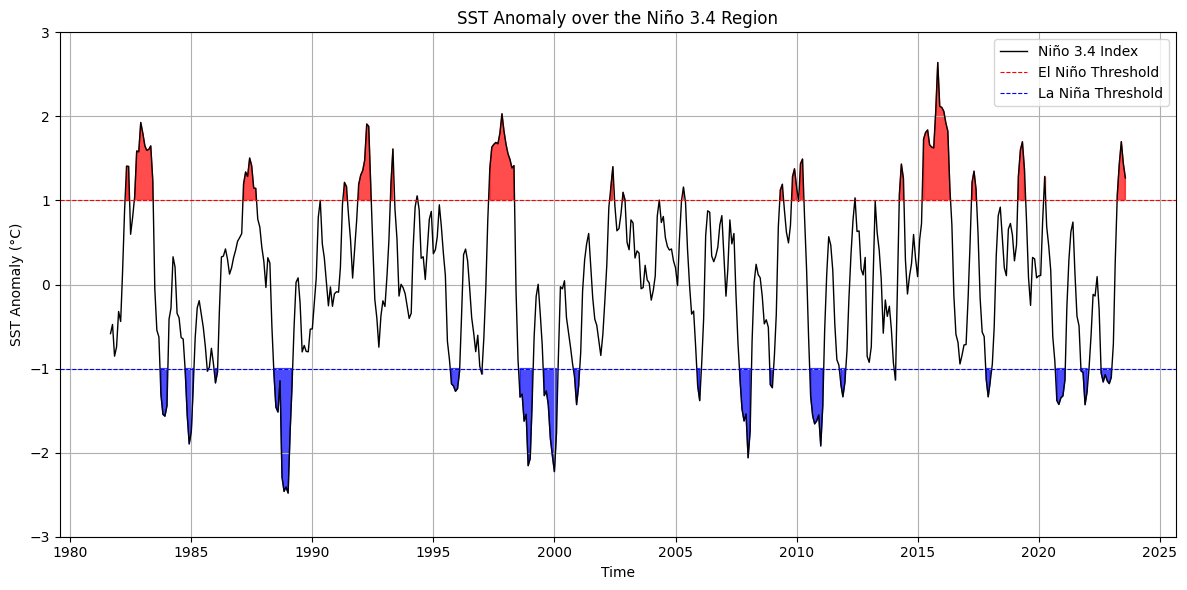

In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Open the NetCDF file containing SST data using xarray
nc_path = 'drive/MyDrive/Data Visualization/sst.nc'
ds = xr.open_dataset(nc_path)

# Retrieve the latitude, longitude, and SST variables
lat = ds['lat']
lon = ds['lon']
sst = ds['sst']  # shape: (time, lat, lon)

# Define the Niño 3.4 region boundaries in degrees East (0-360)
lat_min = -5.0  # 5S
lat_max = 5.0   # 5N
lon_min = 360 - 170.0  # 170W
lon_max = 360 - 120.0  # 120W

def get_area_mean(sst, lat, lon, lat_min, lat_max, lon_min, lon_max):
    """Calculate the mean SST in the specified region."""
    # Select the region
    region_sst = sst.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))
    # Calculate the mean SST in the region, averaged over lat and lon
    return region_sst.mean(dim=['lat', 'lon'])

def get_nino34_index(sst, lat, lon):
    """Calculate the Niño 3.4 index from SST data."""
    return get_area_mean(sst, lat, lon, lat_min, lat_max, lon_min, lon_max)

# Calculate the climatological mean for the first 30 years (360 months)
climatological_mean = sst[:360, :, :].mean(dim='time')

# Calculate anomalies by subtracting the climatological mean
sst_anomalies = sst - climatological_mean

# Calculate the Niño 3.4 index (area-averaged SST anomaly over the Niño 3.4 region)
nino3_4_index = get_nino34_index(sst_anomalies, lat, lon)

# Plotting the Niño 3.4 index using xarray's plot function
plt.figure(figsize=(12, 6))

# Set thresholds for El Niño and La Niña
el_nino_threshold = 1
la_nina_threshold = -1

# Create the x-axis values (time from the dataset)
time = nino3_4_index['time']

# Plot the Niño 3.4 index line
nino3_4_index.plot(color='black', linewidth=1, label='Niño 3.4 Index')

# Add fill_between for El Niño and La Niña regions
plt.fill_between(time, el_nino_threshold, nino3_4_index, where=(nino3_4_index >= el_nino_threshold), color='red', alpha=0.7)
plt.fill_between(time, la_nina_threshold, nino3_4_index, where=(nino3_4_index <= la_nina_threshold), color='blue', alpha=0.7)

# Plot horizontal lines for thresholds
plt.axhline(y=el_nino_threshold, color='red', linestyle='--', linewidth=0.8, label='El Niño Threshold')
plt.axhline(y=la_nina_threshold, color='blue', linestyle='--', linewidth=0.8, label='La Niña Threshold')

# Set plot limits and labels
plt.ylim([-3, 3])
plt.title('SST Anomaly over the Niño 3.4 Region')
plt.xlabel('Time')
plt.ylabel('SST Anomaly (°C)')
plt.legend()
plt.grid()

# Display the plot
plt.tight_layout()
plt.show()

# Close the dataset
ds.close()


In [ ]:
# Open the NetCDF file containing SST data using xarray
nc_path = 'drive/MyDrive/Data Visualization/sst.nc'
ds = xr.open_dataset(nc_path)
ds


<xarray.Dataset> Size: 21MB
Dimensions:  (time: 504, lon: 144, lat: 72)
Coordinates:
  * time     (time) datetime64[ns] 4kB 1981-09-01 1981-10-01 ... 2023-08-01
  * lon      (lon) float32 576B 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 288B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
Data variables:
    sst      (time, lat, lon) float32 21MB ...
Attributes:
    CDI:            Climate Data Interface version 1.9.3 (http://mpimet.mpg.d...
    history:        Tue Sep 12 07:33:39 2023: cdo remapbil,r144x72 sst.mon.me...
    source:         NOAA/NCEI https://www.ncei.noaa.gov/data/sea-surface-temp...
    institution:    NOAA/National Centers for Environmental Information
    Conventions:    CF-1.5
    title:          NOAA/NCEI 1/4 Degree Daily Optimum Interpolation Sea Surf...
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Daily Optimum Interpolation Sea Surface Temperature
    version:        Version 2.1
    comment:        Reynolds, et al.(2007) Daily High-Resolution-Blended Anal...
    CDO:            Climate Data Operators version 1.9.3 (http://mpimet.mpg.d...

<xarray.Dataset> Size: 21MB
Dimensions:  (time: 504, lon: 144, lat: 72)
Coordinates:
  * time     (time) datetime64[ns] 4kB 1981-09-01 1981-10-01 ... 2023-08-01
  * lon      (lon) float32 576B 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 288B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
Data variables:
    sst      (time, lat, lon) float32 21MB ...
Attributes:
    CDI:            Climate Data Interface version 1.9.3 (http://mpimet.mpg.d...
    history:        Tue Sep 12 07:33:39 2023: cdo remapbil,r144x72 sst.mon.me...
    source:         NOAA/NCEI https://www.ncei.noaa.gov/data/sea-surface-temp...
    institution:    NOAA/National Centers for Environmental Information
    Conventions:    CF-1.5
    title:          NOAA/NCEI 1/4 Degree Daily Optimum Interpolation Sea Surf...
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Daily Optimum Interpolation Sea Surface Temperature
    version:        Version

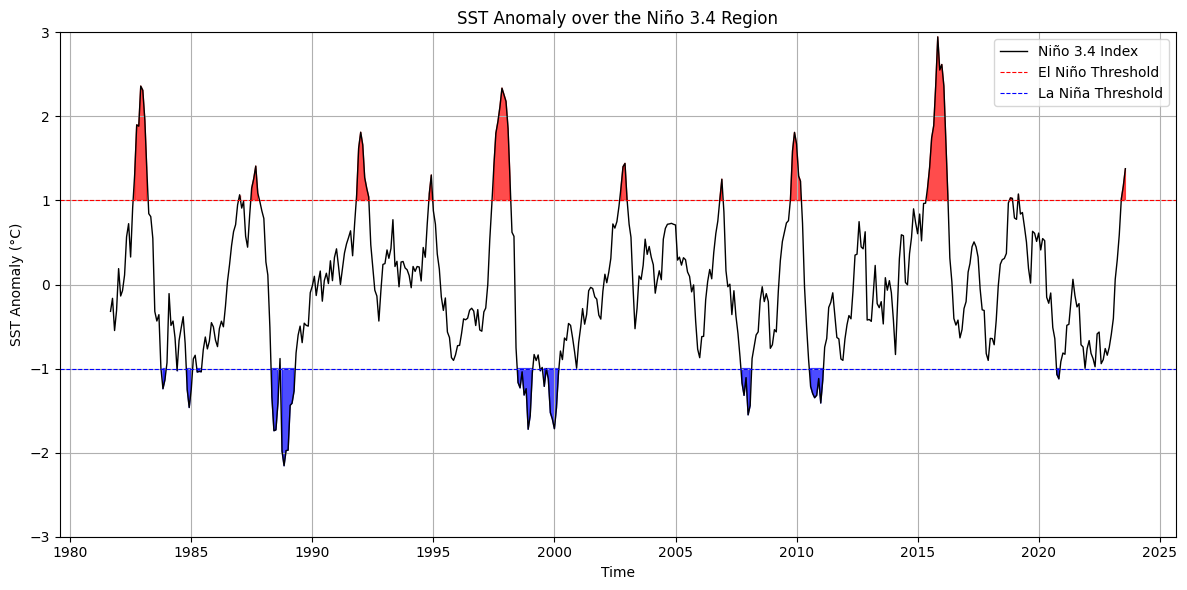

In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Open the NetCDF file containing SST data using xarray
nc_path = 'drive/MyDrive/Data Visualization/sst.nc'
ds = xr.open_dataset(nc_path)
print(ds)

# Retrieve the latitude, longitude, and SST variables
lat = ds['lat']
lon = ds['lon']
sst = ds['sst']  # shape: (time, lat, lon)

# Define the Niño 3.4 region boundaries in degrees East (0-360)
lat_min = -5.0  # 5S
lat_max = 5.0   # 5N
lon_min = 360 - 170.0  # 170W
lon_max = 360 - 120.0  # 120W

def get_area_mean(sst, lat, lon, lat_min, lat_max, lon_min, lon_max):
    """Calculate the mean SST in the specified region."""
    # Select the region
    region_sst = sst.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))
    # Calculate the mean SST in the region, averaged over lat and lon
    return region_sst.mean(dim=['lat', 'lon'])

def get_nino34_index(sst, lat, lon):
    """Calculate the Niño 3.4 index from SST data."""
    return get_area_mean(sst, lat, lon, lat_min, lat_max, lon_min, lon_max)

# Calculate the monthly climatological mean
monthly_climatology = sst.groupby('time.month').mean(dim='time')

# Calculate anomalies by subtracting the monthly climatological mean
sst_anomalies = sst.groupby('time.month') - monthly_climatology

# Calculate the Niño 3.4 index (area-averaged SST anomaly over the Niño 3.4 region)
nino3_4_index = get_nino34_index(sst_anomalies, lat, lon)

# Plotting the Niño 3.4 index using xarray's plot function
plt.figure(figsize=(12, 6))

# Set thresholds for El Niño and La Niña
el_nino_threshold = 1
la_nina_threshold = -1

# Create the x-axis values (time from the dataset)
time = nino3_4_index['time']

# Plot the Niño 3.4 index line
nino3_4_index.plot(color='black', linewidth=1, label='Niño 3.4 Index')

# Add fill_between for El Niño and La Niña regions
plt.fill_between(time, el_nino_threshold, nino3_4_index, where=(nino3_4_index >= el_nino_threshold), color='red', alpha=0.7)
plt.fill_between(time, la_nina_threshold, nino3_4_index, where=(nino3_4_index <= la_nina_threshold), color='blue', alpha=0.7)

# Plot horizontal lines for thresholds
plt.axhline(y=el_nino_threshold, color='red', linestyle='--', linewidth=0.8, label='El Niño Threshold')
plt.axhline(y=la_nina_threshold, color='blue', linestyle='--', linewidth=0.8, label='La Niña Threshold')

# Set plot limits and labels
plt.ylim([-3, 3])
plt.title('SST Anomaly over the Niño 3.4 Region')
plt.xlabel('Time')
plt.ylabel('SST Anomaly (°C)')
plt.legend()
plt.grid()

# Display the plot
plt.tight_layout()
plt.show()

# Close the dataset
ds.close()


# EX 2:

In [ ]:
sst_nino34 = ds.sel(lat=slice(-5,5),lon=slice(360-170,360-120))
sst_nino34

<xarray.Dataset> Size: 173kB
Dimensions:  (time: 504, lon: 21, lat: 4)
Coordinates:
  * time     (time) datetime64[ns] 4kB 1981-09-01 1981-10-01 ... 2023-08-01
  * lon      (lon) float32 84B 190.0 192.5 195.0 197.5 ... 235.0 237.5 240.0
  * lat      (lat) float32 16B -3.75 -1.25 1.25 3.75
Data variables:
    sst      (time, lat, lon) float32 169kB 27.9 27.64 27.47 ... 28.21 28.22
Attributes:
    CDI:            Climate Data Interface version 1.9.3 (http://mpimet.mpg.d...
    history:        Tue Sep 12 07:33:39 2023: cdo remapbil,r144x72 sst.mon.me...
    source:         NOAA/NCEI https://www.ncei.noaa.gov/data/sea-surface-temp...
    institution:    NOAA/National Centers for Environmental Information
    Conventions:    CF-1.5
    title:          NOAA/NCEI 1/4 Degree Daily Optimum Interpolation Sea Surf...
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Daily Optimum Interpolation Sea Surface Temperature
    version:        Version 2.1
    comment:        Reynolds, et al.(2007) Daily High-Resolution-Blended Anal...
    CDO:            Climate Data Operators version 1.9.3 (http://mpimet.mpg.d...

In [ ]:
gb = sst_nino34.sst.groupby('time.month')
sst_nino34_anom = gb - gb.mean(dim='time')
index_nino34 = sst_nino34_anom.mean(dim=['lat','lon'])
index_nino34

<xarray.DataArray 'sst' (time: 504)> Size: 2kB
array([-3.19172919e-01, -1.64342746e-01, -5.47262430e-01, -3.09585720e-01,
        1.89207345e-01, -1.36562005e-01, -7.22229332e-02,  1.13533653e-01,
        5.66714585e-01,  7.23883927e-01,  3.27312768e-01,  9.12661254e-01,
        1.31811881e+00,  1.89962804e+00,  1.88368011e+00,  2.36050153e+00,
        2.31075406e+00,  1.95372105e+00,  1.39063811e+00,  8.42881680e-01,
        8.07786822e-01,  5.50078332e-01, -3.20795953e-01, -4.34042037e-01,
       -3.58586729e-01, -9.92037535e-01, -1.23990536e+00, -1.13307941e+00,
       -9.29955423e-01, -1.07970305e-01, -4.86729264e-01, -4.34445649e-01,
       -6.32419586e-01, -1.02405548e+00, -6.66469872e-01, -5.20465851e-01,
       -3.82999420e-01, -7.01901197e-01, -1.24958682e+00, -1.46306205e+00,
       -1.24686980e+00, -8.84642124e-01, -8.41244459e-01, -1.04109442e+00,
       -1.03319824e+00, -1.03781247e+00, -7.77730286e-01, -6.24213815e-01,
       -7.65778244e-01, -6.73053265e-01, -4.53451008e-01, -5.04386902e-01,
       -6.60038888e-01, -7.38754690e-01, -5.25321007e-01, -4.36344504e-01,
       -5.02772808e-01, -2.57627994e-01,  3.40495110e-02,  2.33918756e-01,
        4.63482797e-01,  6.29309297e-01,  7.12400258e-01,  9.48383629e-01,
        1.06789112e+00,  9.09153283e-01,  9.90826130e-01,  5.73990881e-01,
        4.44223046e-01,  8.23894680e-01,  1.14443052e+00,  1.25761425e+00,
        1.40879524e+00,  1.08897340e+00,  9.89567637e-01,  8.78957748e-01,
        7.85362244e-01,  2.68208742e-01,  1.13199621e-01, -5.08745313e-01,
...
        5.07230103e-01,  4.48178530e-01,  3.27060401e-01, -5.14412150e-02,
       -3.00484449e-01, -3.08558255e-01, -8.20537448e-01, -9.02534962e-01,
       -6.40513182e-01, -6.43316805e-01, -7.16313660e-01, -4.23394054e-01,
       -2.23744474e-02,  2.39748955e-01,  2.95696974e-01,  3.09836626e-01,
        3.69700998e-01,  9.69883323e-01,  1.03114009e+00,  1.02407205e+00,
        7.92080760e-01,  7.75169671e-01,  1.07741535e+00,  8.37837040e-01,
        8.56986105e-01,  6.84912562e-01,  5.04401982e-01,  1.90761209e-01,
        1.70959067e-02,  6.32989228e-01,  6.09803855e-01,  5.12931645e-01,
        6.12298787e-01,  4.11373854e-01,  5.46818078e-01,  5.21450222e-01,
       -1.51546910e-01, -2.22710311e-01, -1.00607872e-01, -5.11373162e-01,
       -6.45063818e-01, -1.06780672e+00, -1.12180805e+00, -9.16205466e-01,
       -8.14794183e-01, -8.29862475e-01, -4.85440105e-01, -4.73325461e-01,
       -2.14969546e-01,  6.21368997e-02, -1.30442575e-01, -2.66039878e-01,
       -2.26597533e-01, -7.16537297e-01, -7.42946148e-01, -9.96581852e-01,
       -7.63016284e-01, -6.66803241e-01, -8.18879068e-01, -8.82092535e-01,
       -9.77922738e-01, -5.87342262e-01, -5.65392613e-01, -9.41664994e-01,
       -8.93897176e-01, -7.61273444e-01, -8.40900540e-01, -7.46150672e-01,
       -5.92385411e-01, -4.03205246e-01,  6.18718937e-02,  2.97088206e-01,
        5.91244042e-01,  1.01859033e+00,  1.17084372e+00,  1.37807488e+00],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 4kB 1981-09-01 1981-10-01 ... 2023-08-01
    month    (time) int64 4kB 9 10 11 12 1 2 3 4 5 6 7 ... 11 12 1 2 3 4 5 6 7 8

In [ ]:
file= 'drive/MyDrive/Data Visualization/precip.mon.mean.nc'
ds_precip=xr.open_dataset(file)
ds_precip=ds_precip.sel(time=slice(ds_nino34['time'][0],ds_nino34['time'][-1]))
ds_precip

<xarray.Dataset> Size: 21MB
Dimensions:    (lat: 72, lon: 144, time: 504, nv: 2)
Coordinates:
  * lat        (lat) float32 288B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * lon        (lon) float32 576B 1.25 3.75 6.25 8.75 ... 353.8 356.2 358.8
  * time       (time) datetime64[ns] 4kB 1981-09-01 1981-10-01 ... 2023-08-01
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) datetime64[ns] 8kB ...
    lat_bnds   (lat, nv) float32 576B ...
    lon_bnds   (lon, nv) float32 1kB ...
    precip     (time, lat, lon) float32 21MB ...
Attributes: (12/18)
    Conventions:           CF-1.0
    curator:               Dr. Jian-Jian Wang\nESSIC, University of Maryland ...
    citation:              Adler, R.F., G.J. Huffman, A. Chang, R. Ferraro, P...
    title:                 GPCP Version 2.3 Combined Precipitation Dataset (F...
    platform:              NOAA POES (Polar Orbiting Environmental Satellites)
    source_obs:            CDR RSS SSMI/SSMIS Tbs over ocean \nCDR SSMI/SSMIS...
    ...                    ...
    source:                https://www.ncei.noaa.gov/data/global-precipitatio...
    source_documentation:  https://www.ncdc.noaa.gov/cdr/atmospheric/precipit...
    NCO:                   4.6.9
    history:               Generated at NOAA/ESRL PSD Sep 9 2016 based on dat...
    References:            http://www.psl.noaa.gov/data/gridded/data.gpcp.html
    data_comment:          Interim data covers 2023/07 through latest.

In [ ]:
elnino=index_nino34.where(index_nino34>=1)
lanina=index_nino34.where(index_nino34<=-1)
neutral=index_nino34.where(np.logical_and(index_nino34 > -1,index_nino34 < 1))


In [ ]:
print('El Nino: ',elnino.count(dim='time').values)
print('Neutral: ',neutral.count(dim='time').values)
print('La Nina: ',lanina.count(dim='time').values)

counts=[elnino.count(dim='time').values,
        lanina.count(dim='time').values,
        neutral.count(dim='time').values]
print(counts)

El Nino:  59
Neutral:  394
La Nina:  51
[array(59), array(51), array(394)]


In [ ]:
ds_climo=ds_precip.groupby('time.month').mean()
ds_anoms=ds_precip.groupby('time.month')-ds_climo
ds_anoms

<xarray.Dataset> Size: 22MB
Dimensions:   (lat: 72, lon: 144, time: 504, nv: 2)
Coordinates:
  * lat       (lat) float32 288B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * lon       (lon) float32 576B 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * time      (time) datetime64[ns] 4kB 1981-09-01 1981-10-01 ... 2023-08-01
    month     (time) int64 4kB 9 10 11 12 1 2 3 4 5 6 ... 11 12 1 2 3 4 5 6 7 8
Dimensions without coordinates: nv
Data variables:
    lat_bnds  (time, lat, nv) float32 290kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    lon_bnds  (time, lon, nv) float32 581kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    precip    (time, lat, lon) float32 21MB 0.07496 0.03842 ... 0.04423 0.03773

In [ ]:
elnino_precip=ds_anoms.sel(time=elnino.dropna(dim='time')['time']).mean(dim='time')
lanina_precip=ds_anoms.sel(time=lanina.dropna(dim='time')['time']).mean(dim='time')
neutral_precip=ds_anoms.sel(time=neutral.dropna(dim='time')['time']).mean(dim='time')

comp_precip=[elnino_precip,lanina_precip,neutral_precip]
print(comp_precip)

[<xarray.Dataset> Size: 44kB
Dimensions:   (lat: 72, lon: 144, nv: 2)
Coordinates:
  * lat       (lat) float32 288B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * lon       (lon) float32 576B 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
Dimensions without coordinates: nv
Data variables:
    lat_bnds  (lat, nv) float32 576B 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    lon_bnds  (lon, nv) float32 1kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    precip    (lat, lon) float32 41kB -0.004136 -0.01003 ... 0.02163 0.004282, <xarray.Dataset> Size: 44kB
Dimensions:   (lat: 72, lon: 144, nv: 2)
Coordinates:
  * lat       (lat) float32 288B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * lon       (lon) float32 576B 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
Dimensions without coordinates: nv
Data variables:
    lat_bnds  (lat, nv) float32 576B 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    lon_bnds  (lon, nv) float32 1kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    precip    (lat

Text(0.5, 0.98, 'Composite Precipitation Anomalies during ENSO')

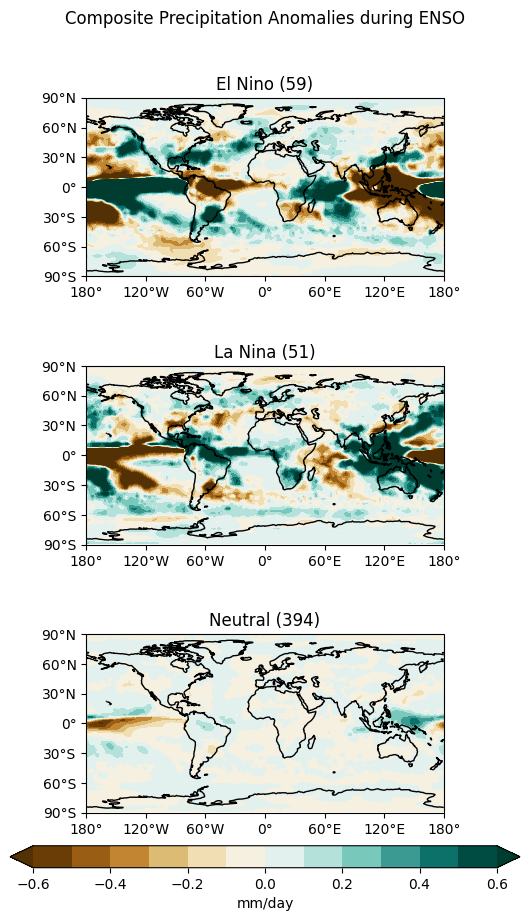

In [ ]:
labels=['El Nino','La Nina', 'Neutral']
clevs=np.arange(-0.6,0.7,0.1)

# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=3,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(8.5,11))

# axs is a 2 dimensional array of `GeoAxes`.
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i,enso in enumerate(comp_precip):

        # Select the season
        data=comp_precip[i]['precip']

        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=comp_precip[i]['lon'])

        # Contour plot
        cs=axs[i].contourf(lons,comp_precip[i]['lat'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='BrBG',extend='both')

       # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)


        # Title each subplot with the name of the season
        axs[i].set_title(labels[i]+' ('+str(counts[i])+')')

        # Draw the coastines for each subplot
        axs[i].coastlines()

# Adjust the location of the subplots
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='mm/day')

# Add a big title at the top
plt.suptitle('Composite Precipitation Anomalies during ENSO')

# EX 3:

In [ ]:
diff_precip = [elnino_precip-neutral_precip,lanina_precip-neutral_precip]
diff_precip

[<xarray.Dataset> Size: 44kB
 Dimensions:   (lat: 72, lon: 144, nv: 2)
 Coordinates:
   * lat       (lat) float32 288B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
   * lon       (lon) float32 576B 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
 Dimensions without coordinates: nv
 Data variables:
     lat_bnds  (lat, nv) float32 576B 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
     lon_bnds  (lon, nv) float32 1kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
     precip    (lat, lon) float32 41kB -0.00263 -0.00783 ... 0.02665 0.001586,
 <xarray.Dataset> Size: 44kB
 Dimensions:   (lat: 72, lon: 144, nv: 2)
 Coordinates:
   * lat       (lat) float32 288B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
   * lon       (lon) float32 576B 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
 Dimensions without coordinates: nv
 Data variables:
     lat_bnds  (lat, nv) float32 576B 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
     lon_bnds  (lon, nv) float32 1kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
 

Text(0.5, 0.98, 'Differences between Neutral and all phenomenons')

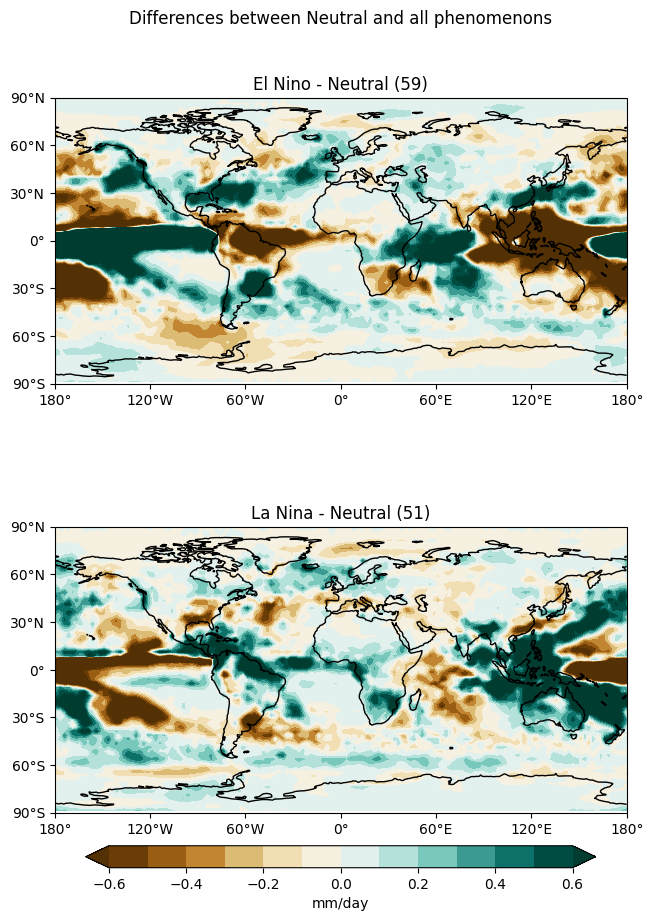

In [ ]:
labels = ['El Nino - Neutral','La Nina - Neutral']
clevs = np.arange(-3,3.5, 0.5)

# Define fig and each axis for the 2 rows and 1 column
fig, axs = plt.subplots(nrows=2, ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(8.5,11))

# axs is a 2 dimensional array of `GeoAxes`.
# We will flatten it into a 1-D array
axs = axs.flatten()

for i,enso in enumerate(diff_precip):

        # Select the season
        data=diff_precip[i]['precip']

        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=diff_precip[i]['lon'])

        # Contour plot
        cs=axs[i].contourf(lons,diff_precip[i]['lat'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='BrBG',extend='both')

       # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)


        # Title each subplot with the name of the season
        axs[i].set_title(labels[i]+' ('+str(counts[i])+')')

        # Draw the coastines for each subplot
        axs[i].coastlines()

# Adjust the location of the subplots
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='mm/day')

# Add a big title at the top
plt.suptitle('Differences between Neutral and all phenomenons')

# EX 4:

In [ ]:
from scipy.stats import ttest_ind

elnino_precip_vals = ds_anoms.sel(time=elnino.dropna(dim='time')['time'])
lanina_precip_vals = ds_anoms.sel(time=lanina.dropna(dim='time')['time'])
neutral_precip_vals = ds_anoms.sel(time=neutral.dropna(dim='time')['time'])

# Perform the t-test
t_statistic1, p_value1 = ttest_ind(elnino_precip_vals['precip'], lanina_precip_vals['precip'],equal_var=False)
t_statistic2, p_value2 = ttest_ind(lanina_precip_vals['precip'], neutral_precip_vals['precip'],equal_var=False)


In [ ]:
p=0.05

mask_diff1 = diff_precip[0]['precip'].where(p_value1 < p)
mask_diff2 = diff_precip[1]['precip'].where(p_value2 < p)
mask_diff = [mask_diff1,mask_diff2]
mask_diff

[<xarray.DataArray 'precip' (lat: 72, lon: 144)> Size: 41kB
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
 Coordinates:
   * lat      (lat) float32 288B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
   * lon      (lon) float32 576B 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8,
 <xarray.DataArray 'precip' (lat: 72, lon: 144)> Size: 41kB
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
 Coordinates:
   * lat      (lat) float32 288B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
   * lon      (lon) 

/usr/local/lib/python3.10/dist-packages/cartopy/mpl/geoaxes.py:1646: UserWarning: The following kwargs were not used by contour: 'color'
  result = super().contourf(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/cartopy/mpl/geoaxes.py:1646: UserWarning: The following kwargs were not used by contour: 'color'
  result = super().contourf(*args, **kwargs)


Text(0.5, 0.98, 'Differences between Neutral and all phenomenons')

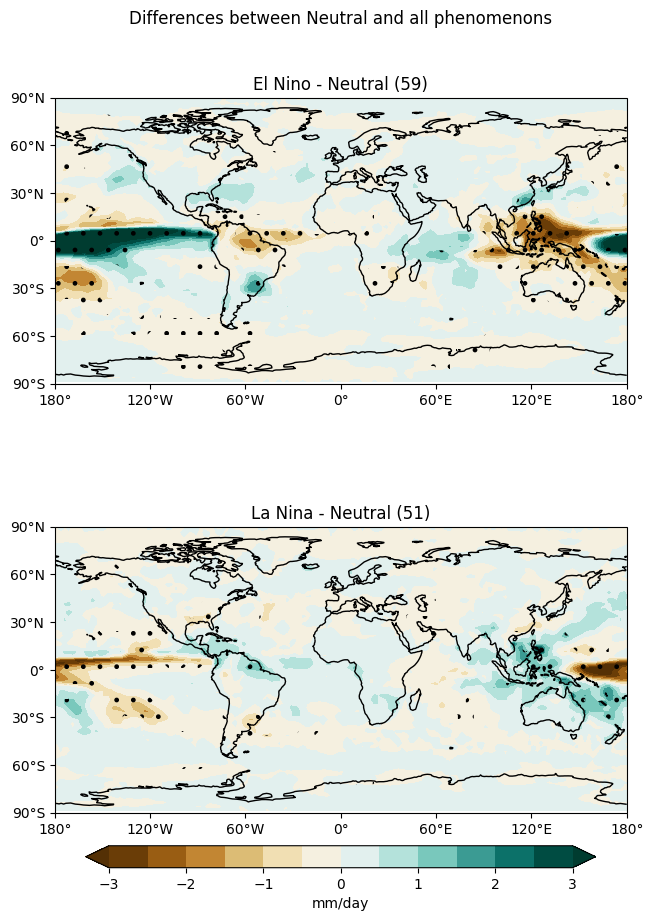

In [ ]:
labels = ['El Nino - Neutral','La Nina - Neutral']
clevs = np.arange(-3,3.5, 0.5)

# Define fig and each axis for the 2 rows and 1 column
fig, axs = plt.subplots(nrows=2, ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(8.5,11))
# axs is a 2 dimensional array of `GeoAxes`.
# We will flatten it into a 1-D array
axs = axs.flatten()

for i, enso in enumerate(diff_precip):
        # Select the season
        data=diff_precip[i]['precip']

        # Add the cyclic point
        data, lons = add_cyclic_point(data, coord=diff_precip[i]['lon'])
        mask_data, lons = add_cyclic_point(mask_diff[i], coord=diff_precip[i]['lon'])

        #Contour plot
        cs = axs[i].contourf(lons, diff_precip[i]['lat'], data, clevs,
                             transform=ccrs.PlateCarree(),
                             cmap = 'BrBG', extend='both')

        axs[i].contourf(lons, diff_precip[i]['lat'],mask_data ,[0,1],
                       transform=ccrs.PlateCarree(), color = 'None',
                       hatches = ['.', ''], extend='both', alpha = 0)

       # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        axs[i].set_title(labels[i]+' ('+str(counts[i])+')')

        # Draw the coastines for each subplot
        axs[i].coastlines()

# Adjust the location of the subplots
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='mm/day')

# Add a big title at the top
plt.suptitle('Differences between Neutral and all phenomenons')